<b> Exploratory Data Analysis (EDA) </b>
* EDA is an approach to analyze datasets, understand their main characteristics, often with visual methods.
* It is a critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations
* In summary EDA is an approach to guage every nuance from the data at early encounter

<b>Case Study</b>
<p>A Fitness wants to profile customers for treadmill products. They collected data of individuals who purchased a treadmill at Fitness retail store during the last three months.</p>

In [2]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load data
cust_data = pd.read_csv(r'./data/CardioGoodFitness.csv')

In [4]:
# shape of data
cust_data.shape

(180, 9)

180 rows, 9 columns

In [6]:
# View first few records
cust_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


* `Product`: Product Code of Treadmills sold to customers. There are 3 types : TM195, TM498, TM798
* `Age`: Age of customers in years
* `Education` : No. of years of education customer has
* `Marital Status`: relationship status, single or partnered;
* `Usage`: average number of times the customer plans to use treadmill each week
* `Fitness : Self rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape
* `Income`: Monthly income 
* `Miles`: average number of miles the customer expects to walk/run each week

In [7]:
# Check datatype of columns
cust_data.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [9]:
# Check for different Treadmill products sold
cust_data['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [10]:
cust_data['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [11]:
cust_data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [12]:
# Five point summary
cust_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


<b>Univariate Analysis</b>

<b> Age feature column </b>

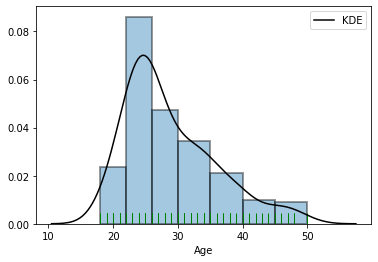

In [13]:
ax = sns.distplot(cust_data['Age'], 
                      bins = [18,22,26,30,35,40,45,50], 
                  rug=True, rug_kws={'color':'g'},
                  kde_kws={'color':'k', "label":"KDE"},
                  hist_kws=dict(edgecolor="k", linewidth=2))

plt.show()

**Observations**:

* The number of customers in the age range 22 to 28 is the highest.
* Very few customers above age 40 who bought Treadmill
* Nearly 90 percent of our customers are in the age range 20 to 40.  

<b>Product feature column </b>

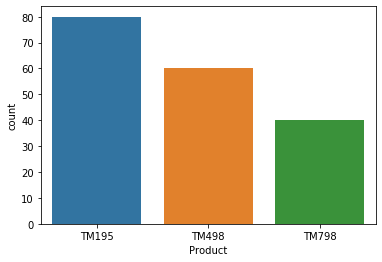

In [24]:
ax = sns.countplot(cust_data.Product)

**Product**:
* 43% of customers bought TM195 model of Treadmill 
* 33% of customers bought TM498 model of Treadmill
* 22% of customers bought TM798 model of Treadmill

TM195 is more popular product amongst customers

<b> Income feature column </b>

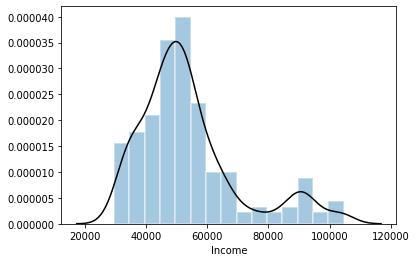

In [17]:
ax = sns.distplot(cust_data['Income'],
                 kde_kws={'color':'k'},
                 hist_kws=dict(edgecolor="w", linewidth=2)
                 )

Distribution of `Income` is showing two peaks, the Income data is rightskewed indicating outliers on the right

<b> Usage and Fitness feature columns </b>

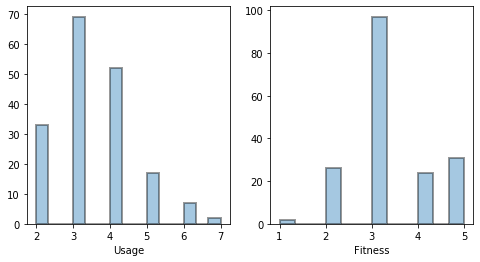

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

sns.distplot(cust_data['Usage'], kde=False, hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[0])
sns.distplot(cust_data['Fitness'], kde = False, hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[1])

plt.show()

* **Usage** Majority of customers said to use treadmill 3 times a week
* **Fitness** Majority of customers rates themselves as 3 on Fitness scale

<b> Miles feature column  </b>

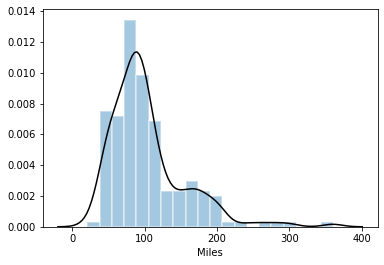

In [20]:
ax = sns.distplot(cust_data['Miles'],
                 kde_kws={'color':'k'},
                 hist_kws=dict(edgecolor="w", linewidth=2)
                 )

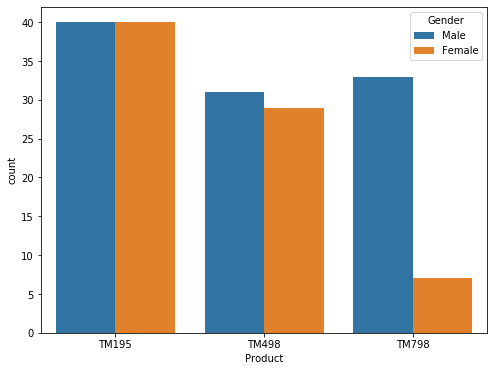

In [30]:
# Comparison of sales of Treadmills between male and female customers

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(cust_data.Product, hue = cust_data.Gender)

* TM798 is less popular amongst female customers

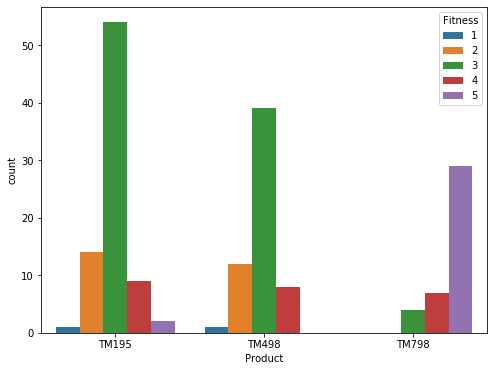

In [46]:
# Comparison of sales of Treadmills between male and female customers

fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(cust_data.Product, hue = cust_data.Fitness)

* Customers high on fitness level (5) prefer TM798
* Customers low or medium on fitness level prefer TM195, TM498

### Bivariate Analysis

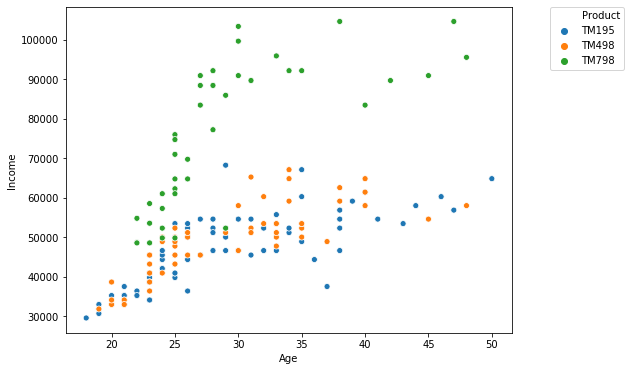

In [38]:
fig, ax = plt.subplots(figsize = (8,6))

ax = sns.scatterplot(x = 'Age', y = 'Income', hue = 'Product', data = cust_data)
ax.legend(loc='best', bbox_to_anchor=(1.25, 1), borderaxespad=0.)

plt.show()

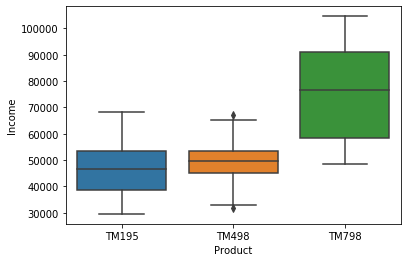

In [40]:
ax = sns.boxplot(x = 'Product', y = 'Income', data = cust_data)
plt.show()

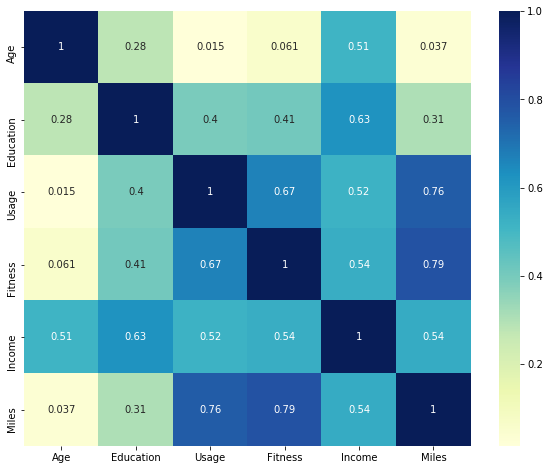

In [44]:
corr = cust_data.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(corr, annot=True, cmap='YlGnBu')


* Fitness - Miles (0.79) - Those who declared themselves high on fitness level, used treadmill for larger miles
* Fitness - Usage (0.67)-  Those who declared themselves high on fitness level, used treadmill for more no. of times 

<b>Conclusions </b>
* TM195 and TM498 customer characters does not vary much
* TM798 - Expert level fitness choice¶ and preferred amongst males and high income people 